<a href="https://colab.research.google.com/github/Vijayalakshmitce/8-2-demo/blob/master/PYF_Project_Learner_Notebook_Full_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [2]:
!pip install numpy==2.0.2 pandas==2.2.2 matplotlib==3.10.0 seaborn==0.13.2 -q --user

**Note**:
- After running the above cell, kindly restart the runtime (for Google Colab) or notebook kernel (for Jupyter Notebook), and run all cells sequentially from the next cell.
- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in ***this notebook***.

In [3]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [4]:
# uncomment and run the below code snippets if the dataset is present in the Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Write your code here to read the data
df=pd.read_csv('/content/drive/MyDrive/foodhub_order.csv')

In [9]:
# Write your code here to view the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [10]:
# Write your code here
df.shape

(1898, 9)

#### Observations:
The data has 1898 rows and 9 columns.



### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Write your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
There are attributes of different types (*int*, *float*, *object*) in
the data.
* order_id,cutomer_id,food_preparation_time,delivery_time are integer datatype(int).
* cut_of_the_order id float data type.
* restaurant_name,cusinir_type,day_of_the_week,rating are object datatype.






### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Write your code here
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations:
*   There is no missing value in the food hub dataset.
*   Using isnull() we able to reterive missing data in the dataset.
*   Sum() will give the total sum of missing value in each columns.







### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Write your code here
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations:


*   On average it takes 27 minutes to prepare the food, with minimum it takes 20 minutes and maximum it takes 35 minutes for the food preparation.




### **Question 5:** How many orders are not rated? [1 mark]

In [17]:
# Write the code here
not_Rated = (df['rating'] == 'Not given').sum()
not_Rated

np.int64(736)

#### Observations:


*   736 orders are not rated for the food order.




### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [19]:
# Write the code here
df['order_id'].nunique()

1898

In [85]:
df['order_id'].unique()

array([1477147, 1477685, 1477070, ..., 1477819, 1477513, 1478056])

In [86]:
df['customer_id'].unique()

array([337525, 358141,  66393, ...,  97838, 292602, 397537])

In [26]:
df['customer_id'].nunique()

1200

In [88]:
df['restaurant_name'].unique()

array(['Hangawi', 'Blue Ribbon Sushi Izakaya', 'Cafe Habana',
       'Blue Ribbon Fried Chicken', 'Dirty Bird to Go',
       'Tamarind TriBeCa', 'The Meatball Shop', 'Barbounia',
       'Anjappar Chettinad', 'Bukhara Grill',
       'Big Wong Restaurant \x8c_¤¾Ñ¼', 'Empanada Mama (closed)', 'Pylos',
       "Lucky's Famous Burgers", 'Shake Shack', 'Sushi of Gari',
       'RedFarm Hudson', 'Blue Ribbon Sushi',
       'Five Guys Burgers and Fries', 'Tortaria', 'Cafe Mogador',
       'Otto Enoteca Pizzeria', 'Vezzo Thin Crust Pizza',
       'Sushi of Gari 46', 'The Kati Roll Company', 'Klong',
       '5 Napkin Burger', 'TAO', 'Parm', 'Sushi Samba',
       'Haru Gramercy Park', 'Chipotle Mexican Grill $1.99 Delivery',
       'RedFarm Broadway', 'Cafeteria', 'DuMont Burger',
       "Sarabeth's East", 'Hill Country Fried Chicken', 'Bistango',
       "Jack's Wife Freda", "Mamoun's Falafel", 'Prosperity Dumpling',
       'Blue Ribbon Sushi Bar & Grill', 'Westville Hudson',
       'Blue Ribbon Br

In [91]:
df['restaurant_name'].nunique()

178

**Observation:**



```
1.order_id and customer_id are identifier columns
2.They dont carry meaningful numeric value for the analysis
3.We can find the number of unique value
4.restaurant_name column doesnt hold weighatage to analyze the data,so just find the number of unique data.
```



In [98]:
df['cuisine_type'].unique()

array(['Korean', 'Japanese', 'Mexican', 'American', 'Indian', 'Italian',
       'Mediterranean', 'Chinese', 'Middle Eastern', 'Thai', 'Southern',
       'French', 'Spanish', 'Vietnamese'], dtype=object)

<Axes: xlabel='cuisine_type', ylabel='count'>

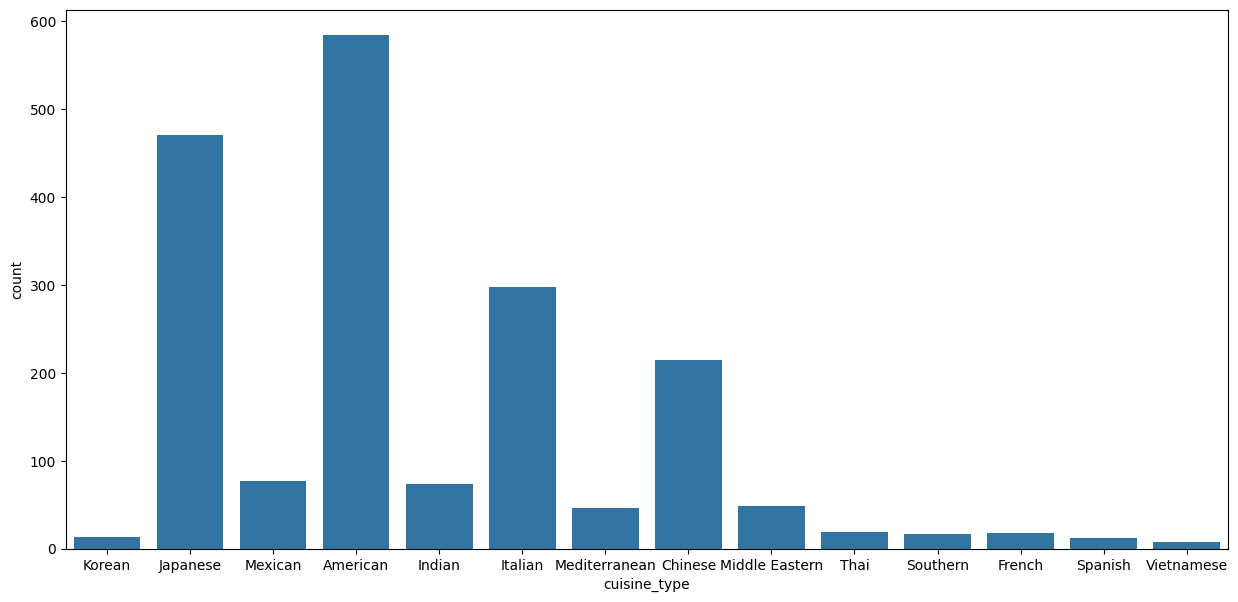

In [97]:
plt.figure(figsize=(15,7))
sns.countplot(df,x='cuisine_type')


**Observation:**
```
1.   American cuisine got more order around 580 orders
2.   japanese cusine got around 470 food orders
3.   italian cuisine got around 280 food orders
4.   chinese cuisine got around 210 food orders
5.   Mexican and indian cuisine got around 180 orders
6.   Mediterranean and middle easterna got less around 50 foods
7.   other five cuisine got less than 50 food orders
```

<Axes: xlabel='cost_of_the_order', ylabel='Count'>

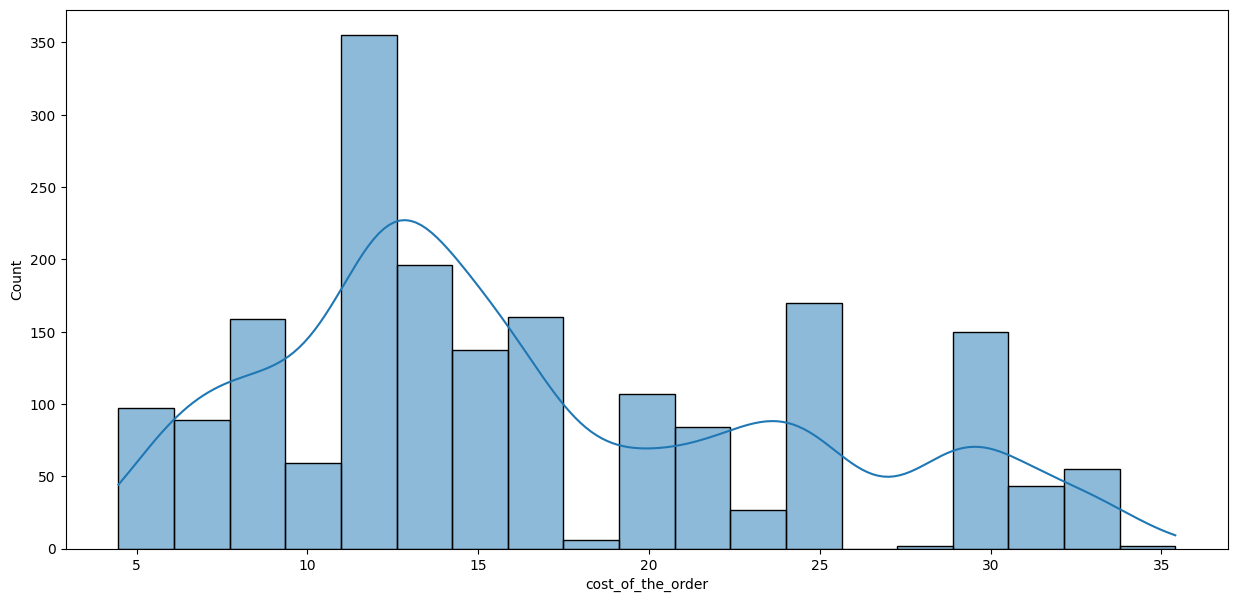

In [71]:
plt.figure(figsize=(15,7))
sns.histplot(df,x='cost_of_the_order',kde=True)

**Observation:**
```
1. Most of them are spending comfortable around 10 - 15 $ per order.
2. High volume orders >25$ is declined due to customer spending between 10-15 $ comfortably.
3. Suggestion to give offer/promotion/free deliver for customer spending more than 20$ to increase customer to buy more food.
4. Otherwise we can introduce combo meal for 25$ to encourge more customer to move into high cost order.
5.  its right skweness ,larger number occurance happen on right side(positive skewness)
```

<Axes: xlabel='cost_of_the_order'>

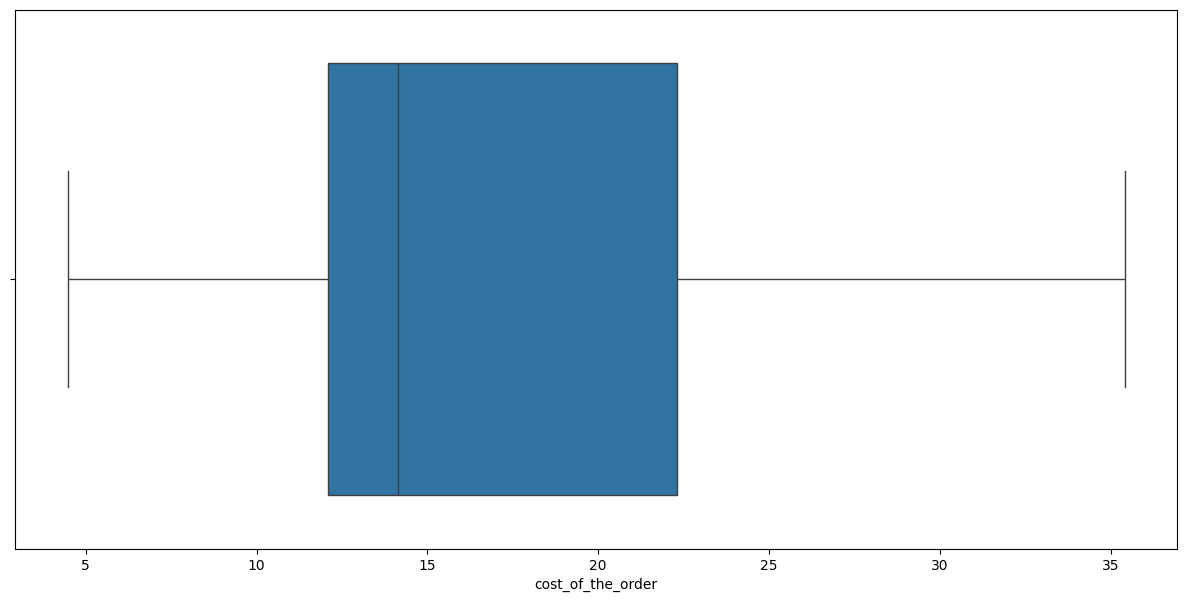

In [75]:
plt.figure(figsize=(15,7))
sns.boxplot(df,x='cost_of_the_order')

**Observation:**
```
1.median value around range 14 -15$
2.Qantitle between 12 to 23$
3.cost of order range between 5 - 35$
4.higher value order is very less
```

<Axes: xlabel='food_preparation_time', ylabel='count'>

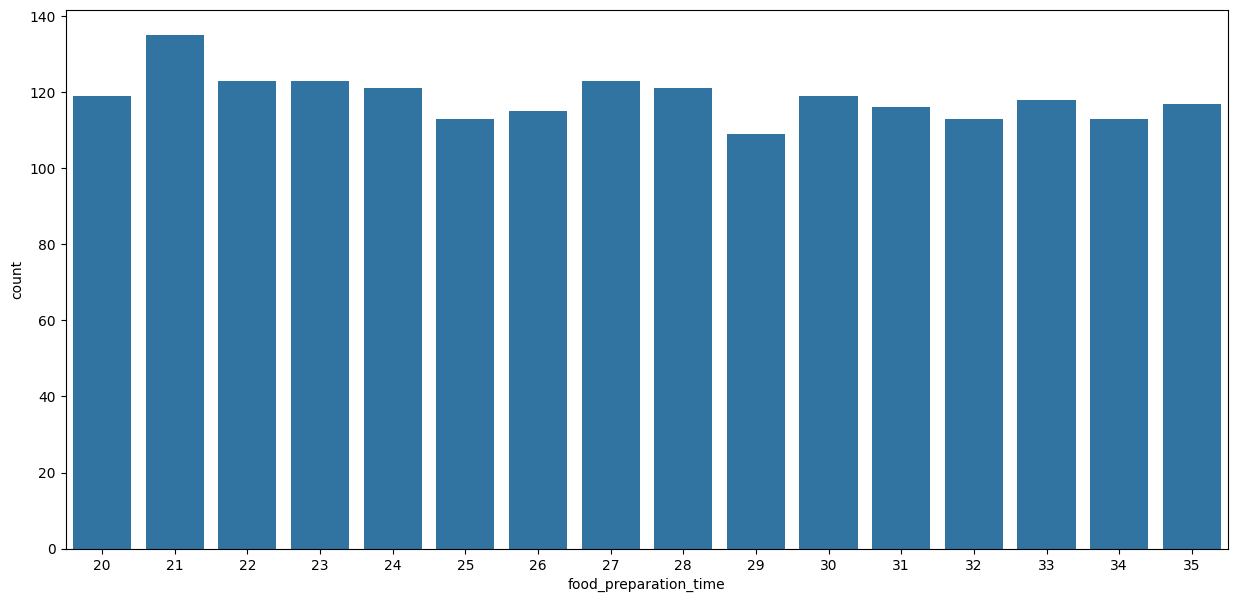

In [76]:
plt.figure(figsize=(15,7))
sns.countplot(df,x='food_preparation_time')

**Observation:**
```
1.food preparation time is min 20 minutes and maximum 35 minutes
2.Slightly more orders have prep times around 21–22 minutes.
3.Slightly fewer orders appear in the 29–30 minute range.
4.It look like normal/uniformaly distributed
```

<Axes: xlabel='food_preparation_time'>

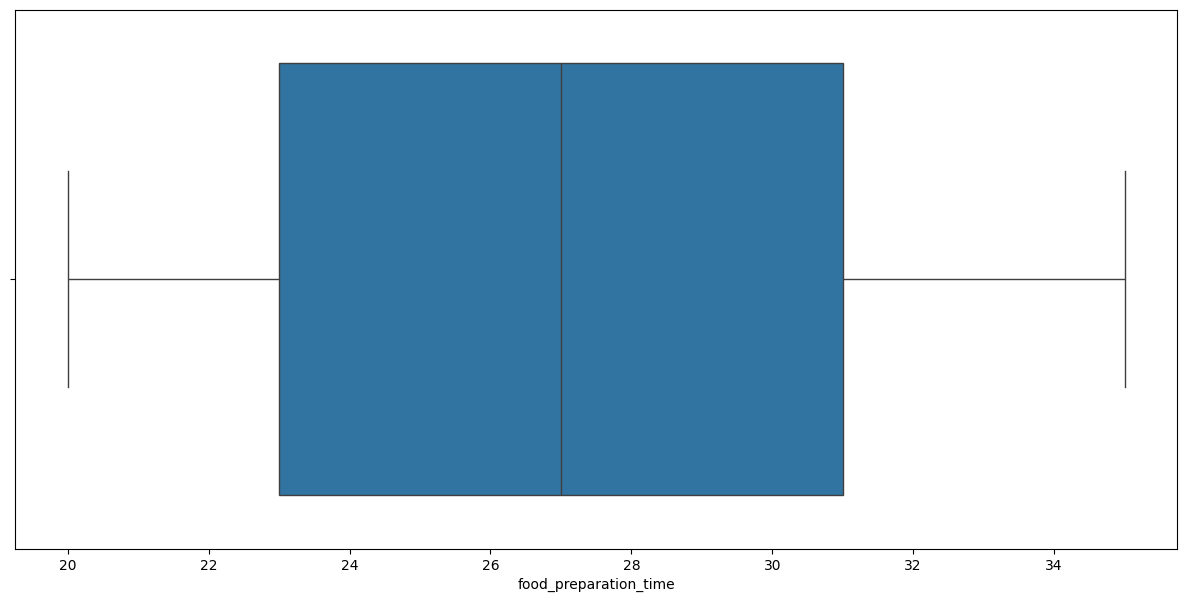

In [43]:
plt.figure(figsize=(15,7))
sns.boxplot(df,x='food_preparation_time')

*Observation:*
```
1.Median foodpreparation time is 27 minutes.
2.Quantitle range between 23 - 31 minutes.
3.Total range of food preparation is 20 -35 minutes.
4.right and left are both are equal and it distributed uniformly.
```

<Axes: xlabel='delivery_time', ylabel='Count'>

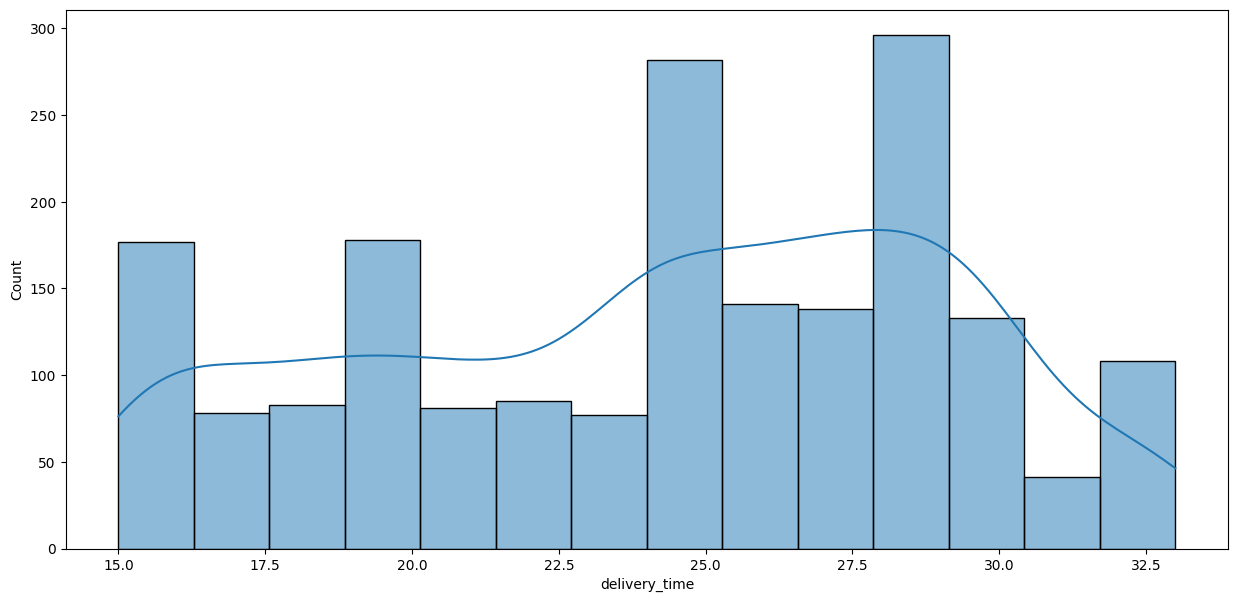

In [77]:
plt.figure(figsize=(15,7))
sns.histplot(df,x='delivery_time',kde=True)

**Observation:**
```
1. Delivery time peak around 25 minutes
2.Sudden drop after 25 minutes
3.again having peak on 27 minutes
4.Delivery time range between 15 minutes to 32 minutes
5.It normal / uniform data distributed
6.Need to focus more delivery below (<25), so that we able to get more order, customer will get trigger to order more food for less delivery time.
```



<Axes: xlabel='delivery_time'>

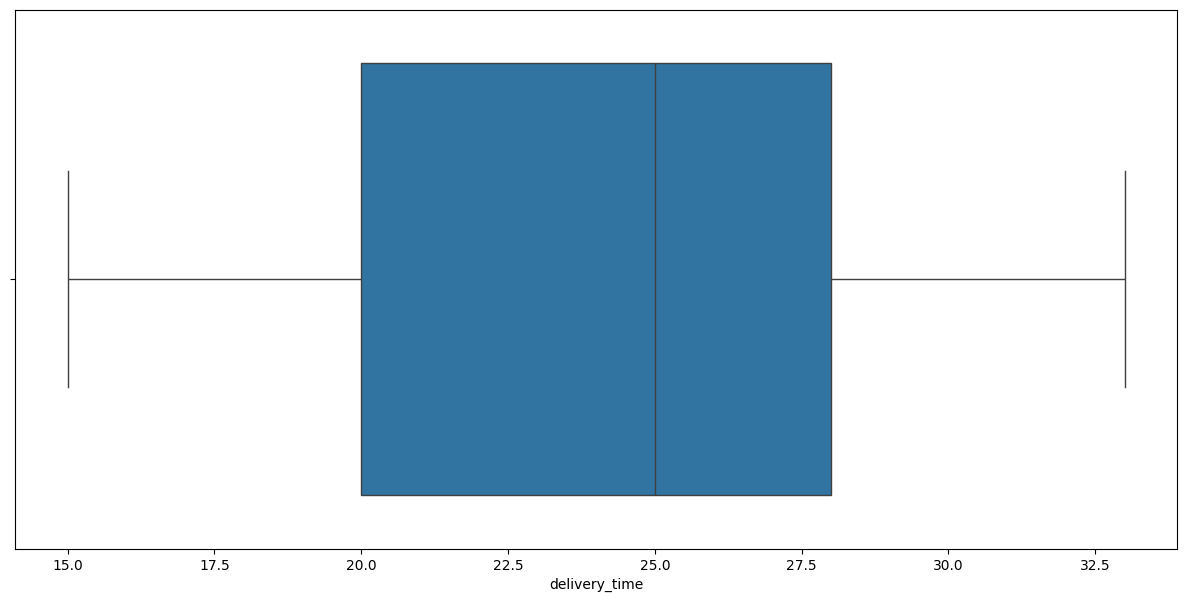

In [46]:
plt.figure(figsize=(15,7))
sns.boxplot(df,x='delivery_time')

**Observation:**
```
1.Median around 25 minutes.
2.Quantitle range between 20 to 28 minutes.
3.Data slightly towards left skweness
4.wishker range around 15 to 33 minutes
5.No outlier
6.Suggestion to decrease delivery time <20 minutes ,to get more order.

```



<Axes: xlabel='day_of_the_week', ylabel='count'>

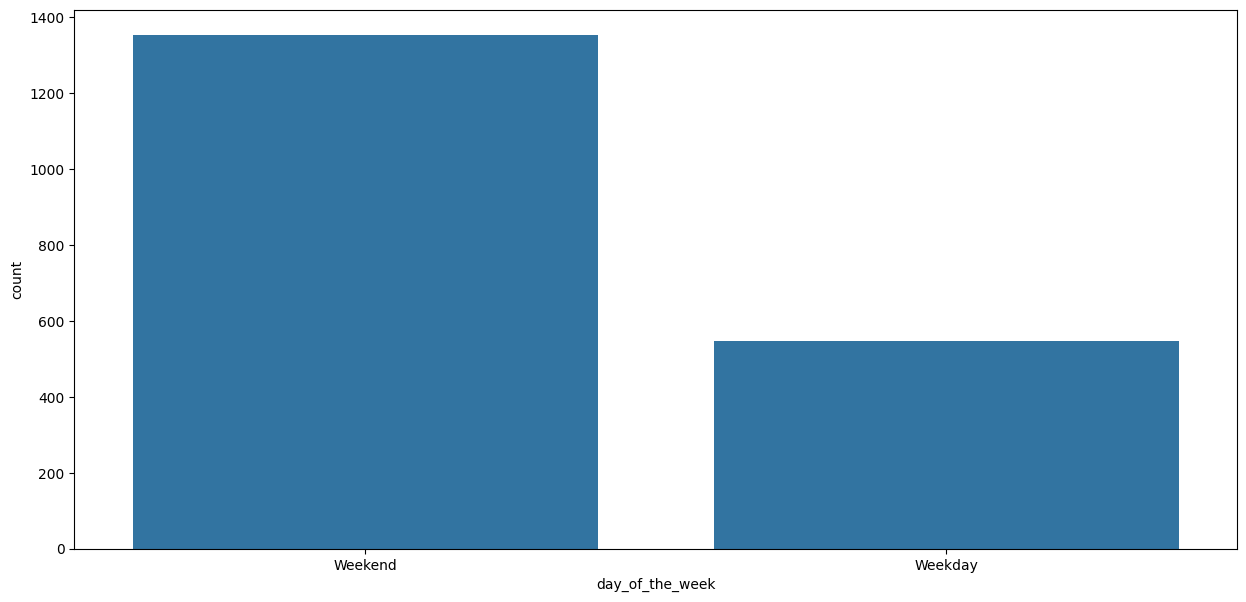

In [99]:
plt.figure(figsize=(15,7))
sns.countplot(df,x='day_of_the_week')

**Observation:**
```
1.More order placed on weekend compare to weekday.
2.Weekend orders are placed around 1300
3.weekday orders are placed around 500.
4.Peak of the order mostly placed on weekend.
```



<Axes: xlabel='rating', ylabel='count'>

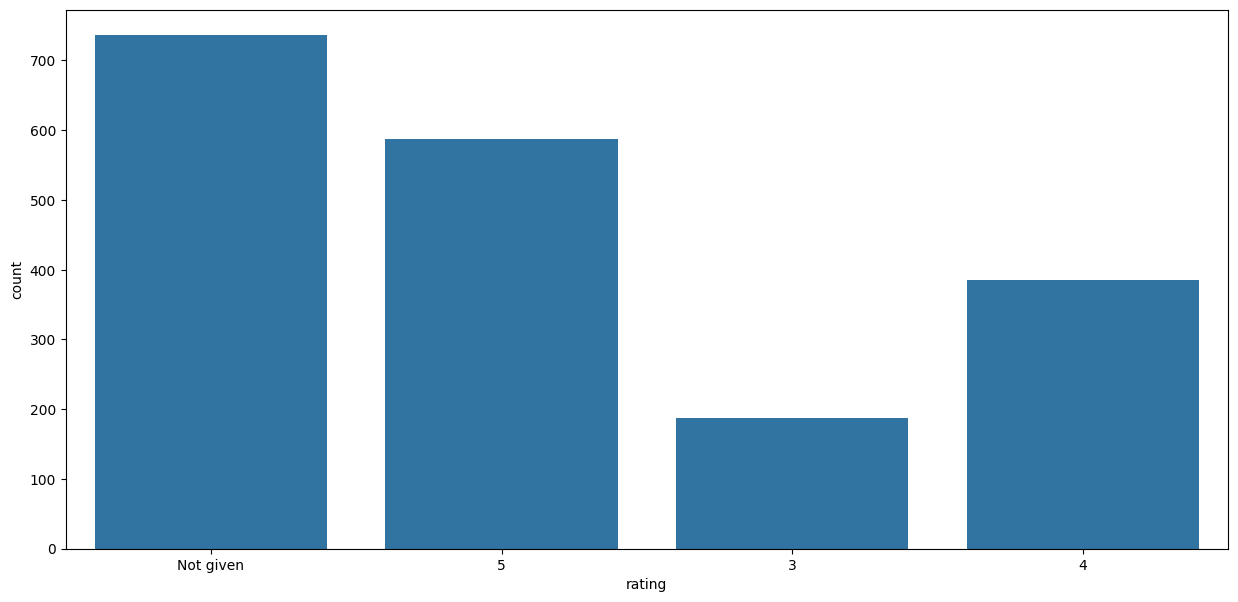

In [100]:
plt.figure(figsize=(15,7))
sns.countplot(df,x='rating')

**Observation:**
```
1.Most of the customer gave 'Not given' rating for the order.
2.second most of the customer gave '5' star rating around 570.
3.We need to engage cutomer to given rating to give offer/promotional offer.
```

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [105]:
# Write the code here
top_resturant = df['restaurant_name'].value_counts().head()
top_resturant

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


#### Observations:
```
1.Finding Top 5 resturant which got more orders.
2.Customer likely order food in this top 5 resturant.
3.Shake shack having orders around 219.
4.The meatball shop having orders around 132
5.Blue ribbon sushi having 119
6.Blue ribbon Fried chicken order between 65 to 100 range.

```



### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [122]:
# Write the code here
weekend_order = df[df['day_of_the_week'] == 'Weekend']
most_popular_cuisine = weekend_order['cuisine_type'].value_counts()
most_popular_cuisine

,count
cuisine_type,
American,415
Japanese,335
Italian,207
Chinese,163
Mexican,53
Indian,49
Middle Eastern,32
Mediterranean,32
Thai,15


#### Observations:
```
1.Popular weekend costomer order cuisine type is American around 415.
2.second most popular is Japanese around 335.
3.Third most popular is Italian around 207.
4.Chinese is fourth most popular aorund 163.
```




### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [133]:
# Write the code here
percentage_order = (df['cost_of_the_order'] > 20).mean() * 100
print("The percentage of the order more than 20 dollars:",percentage_order)

The percentage of the order more than 20 dollars: 29.24130663856691


#### Observations:
```
1.Percentage of the order more than 20$ is around 29%.
2.It look like less percentage for the resturant.
```

### **Question 10**: What is the mean order delivery time? [1 mark]

In [128]:
# Write the code here
mean_deliveryTime = df['delivery_time'].mean()
mean_deliveryTime
print("The mean order for the delivery time:",mean_deliveryTime)

The mean order for the delivery time: 24.161749209694417


#### Observations:
```
1.Average delivery time is around 24 minutes.
```

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [7]:
# Write the code here
top_3_customer = df['customer_id'].value_counts().head(3)
top_3_customer


,count
customer_id,
52832,13
47440,10
83287,9


#### Observations:
```
1.Find top 3 customer,giving 20% discount offer for them
2.Top 3 customer placed order more than 9 to 13 orders.
3.Attracting the 3 top customer to give offer it engage them to use the offer and buy the order.
```

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


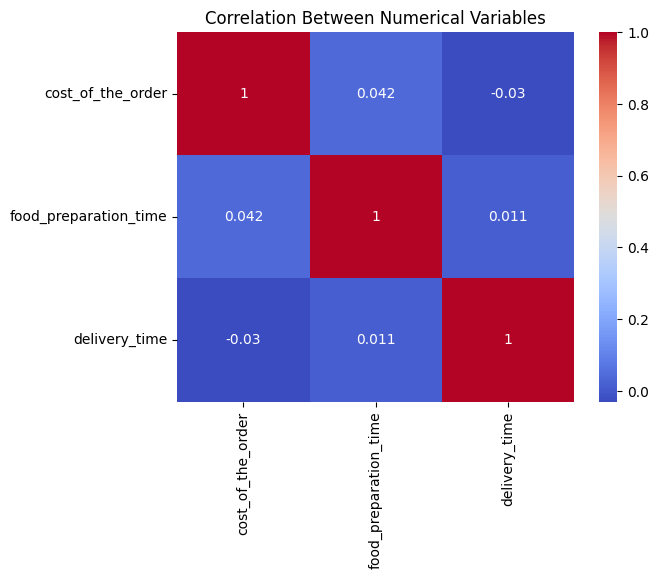

In [14]:
# Write the code here
#Numeric variable relation using heatmap
numeric_col = ['cost_of_the_order','food_preparation_time','delivery_time']
sns.heatmap(df[numeric_col].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Numerical Variables")
plt.show()


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'Korean'),
  Text(1, 0, 'Japanese'),
  Text(2, 0, 'Mexican'),
  Text(3, 0, 'American'),
  Text(4, 0, 'Indian'),
  Text(5, 0, 'Italian'),
  Text(6, 0, 'Mediterranean'),
  Text(7, 0, 'Chinese'),
  Text(8, 0, 'Middle Eastern'),
  Text(9, 0, 'Thai'),
  Text(10, 0, 'Southern'),
  Text(11, 0, 'French'),
  Text(12, 0, 'Spanish'),
  Text(13, 0, 'Vietnamese')])

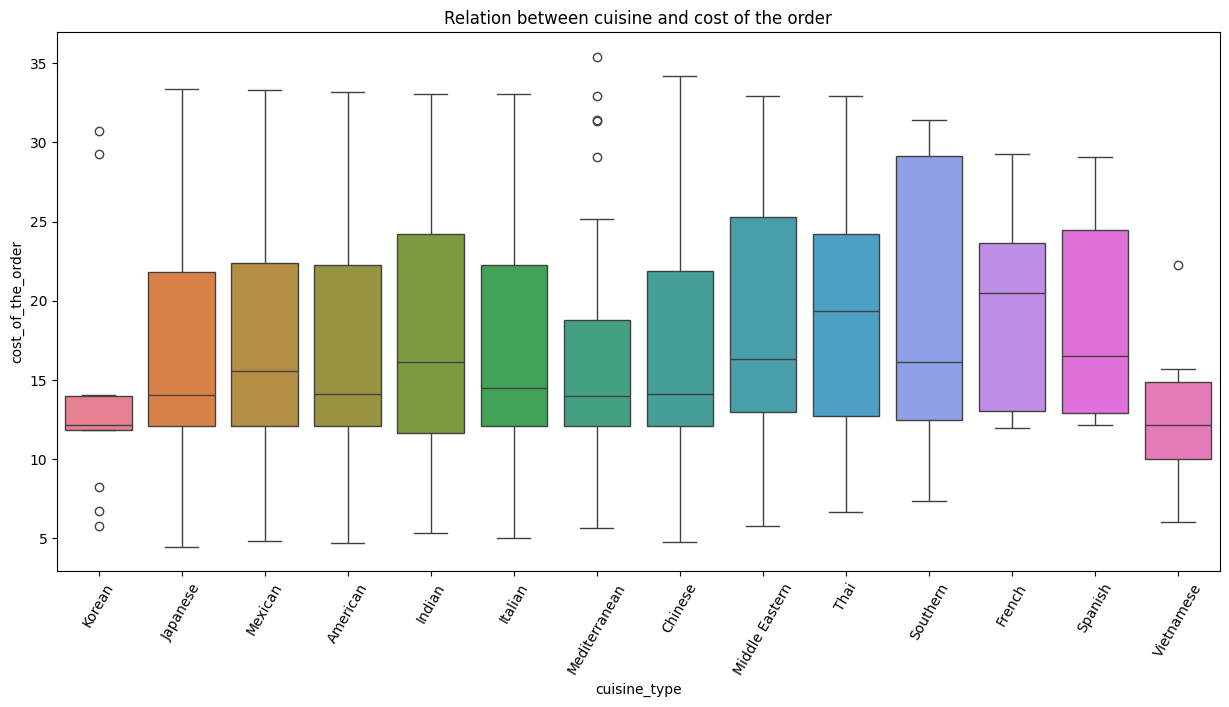

In [20]:
#Relations between categorical & numerical variables
#Cuisine vs Cost of Order
plt.figure(figsize=(15,7))
sns.boxplot(df,x='cuisine_type',y='cost_of_the_order',hue='cuisine_type')
plt.title("Relation between cuisine and cost of the order")
plt.xticks(rotation=60)

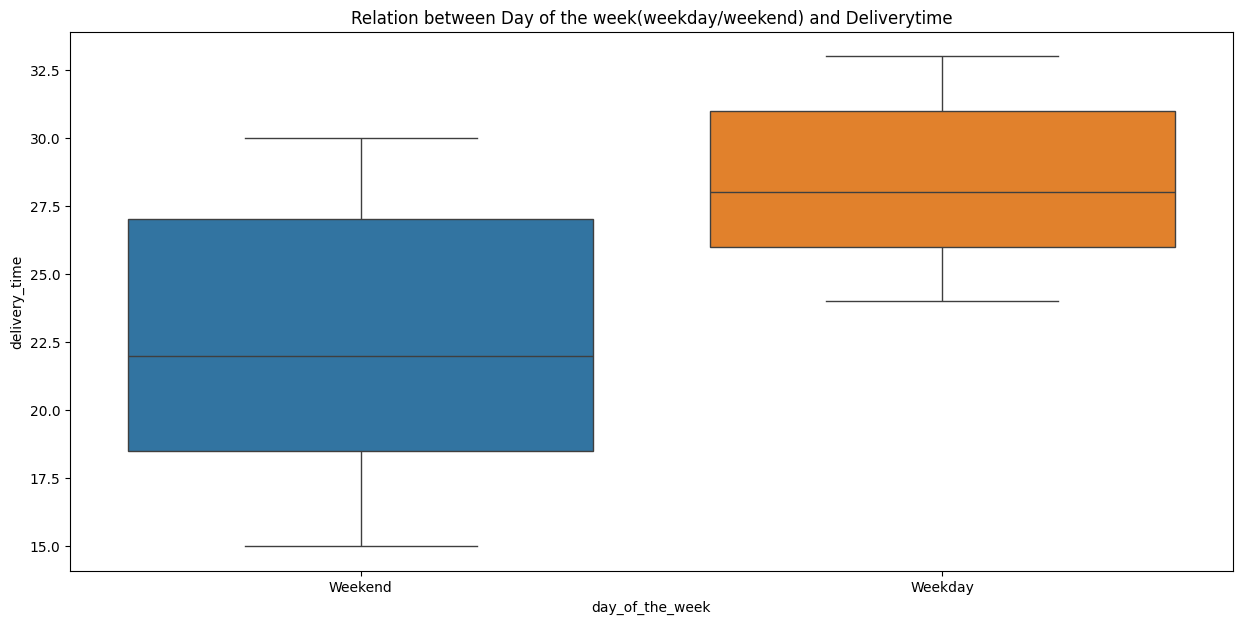

In [21]:
#Day of Week vs Delivery Time
plt.figure(figsize=(15,7))
sns.boxplot(df,x='day_of_the_week',y='delivery_time',hue='day_of_the_week')
plt.title("Relation between Day of the week(weekday/weekend) and Deliverytime")
plt.show()

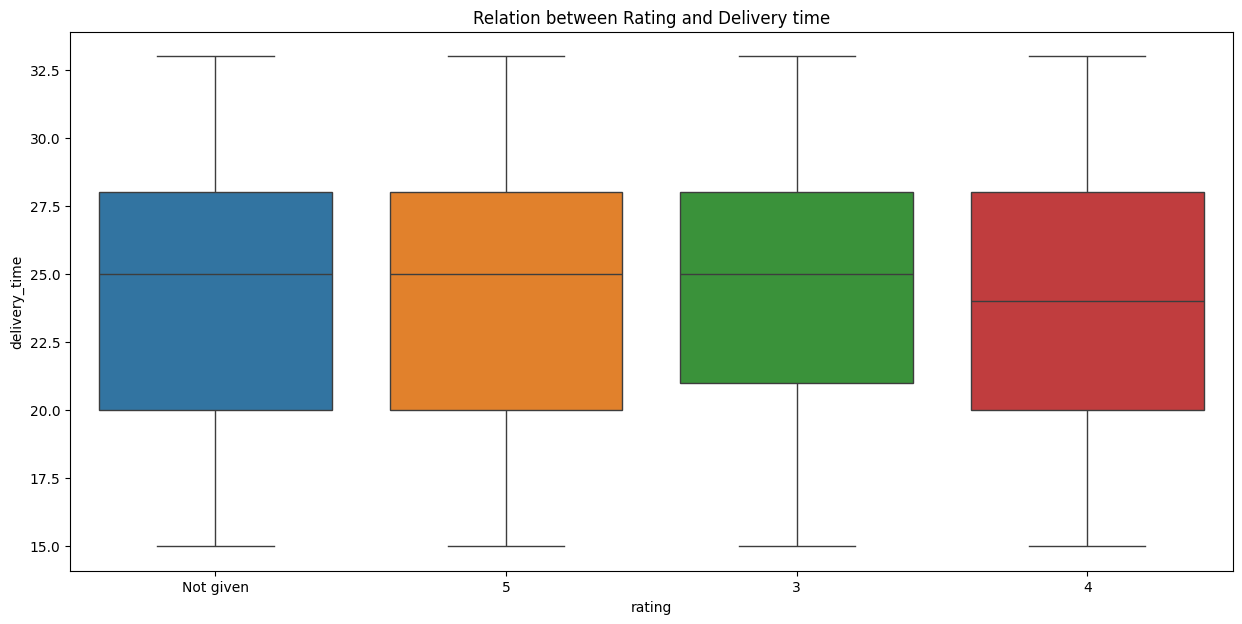

In [23]:
#Rating vs Delivery Time
plt.figure(figsize=(15,7))
sns.boxplot(df,x='rating',y='delivery_time',hue='rating')
plt.title("Relation between Rating and Delivery time")
plt.show()

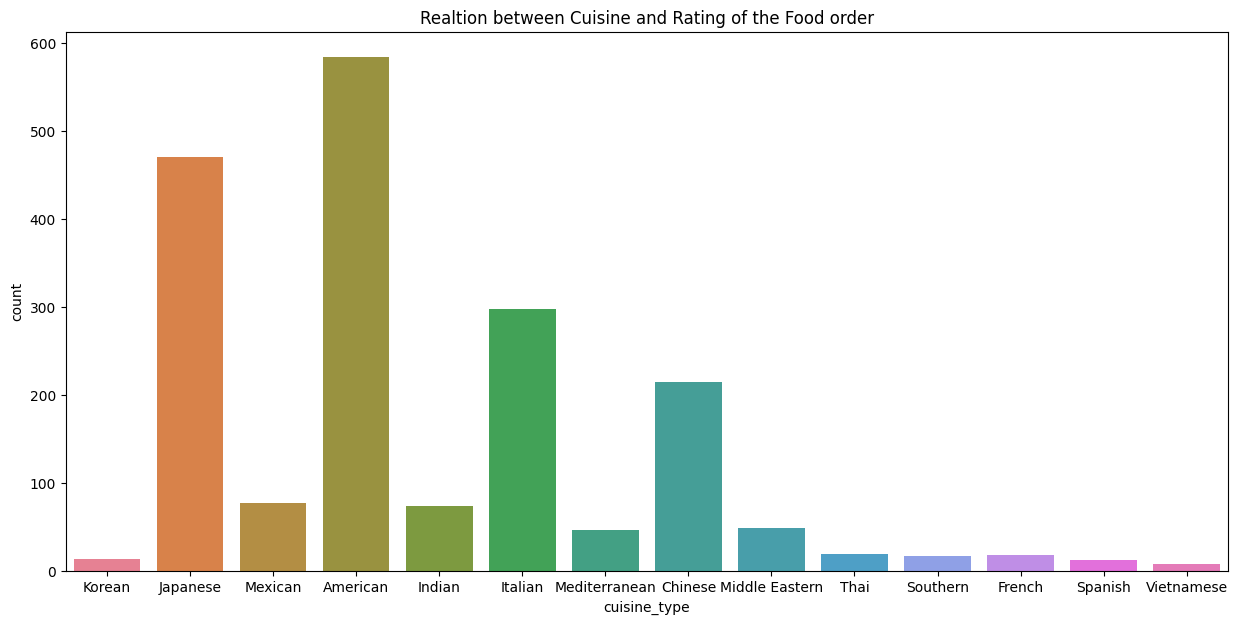

In [25]:
#Relations between categorical & categorical variables
#Cuisine vs Rating
plt.figure(figsize=(15,7))
sns.countplot(df,x='cuisine_type',hue='cuisine_type')
plt.title("Realtion between Cuisine and Rating of the Food order")
plt.show()

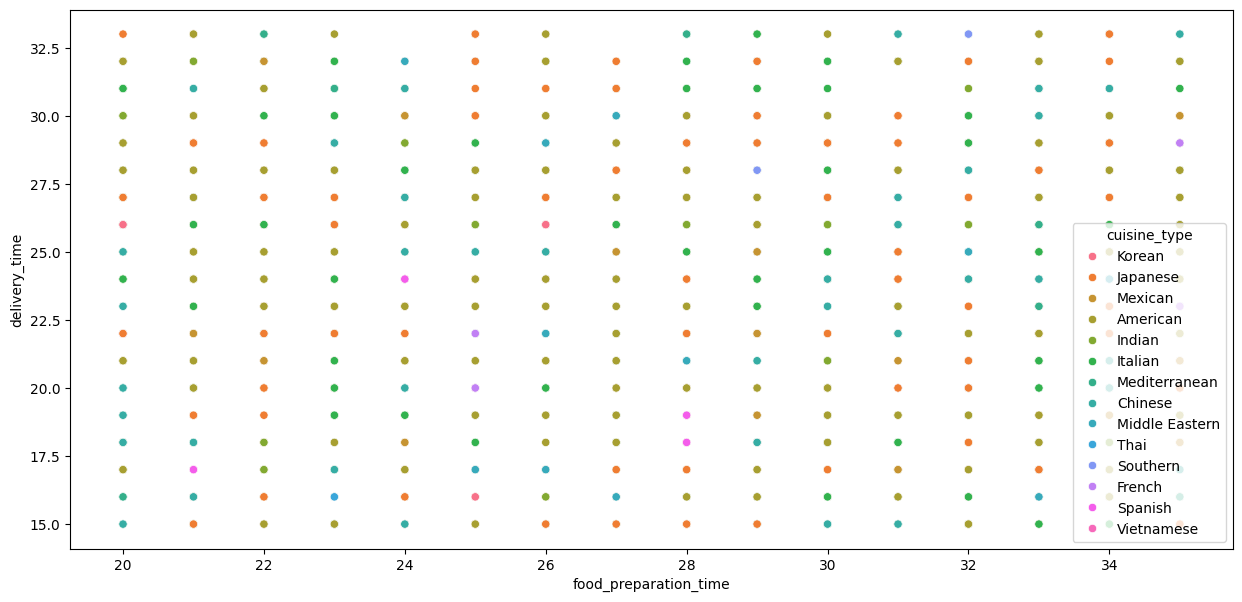

In [35]:
#Cuisine, Prep Time, Delivery Time
plt.figure(figsize=(15,7))
sns.scatterplot(df,x='food_preparation_time',y='delivery_time',hue='cuisine_type')
plt.show()

<Figure size 1500x700 with 0 Axes>

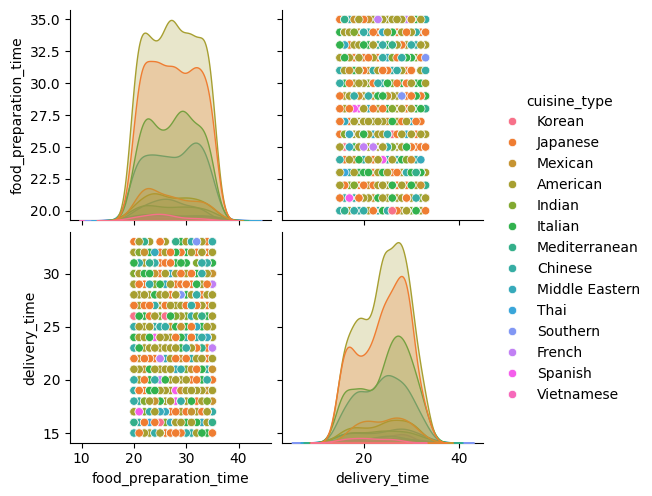

In [41]:
plt.figure(figsize=(15,7))
# sns.lineplot(df,x='food_preparation_time',y='delivery_time',col='cuisine_type')
sns.pairplot(data=df,vars=['food_preparation_time','delivery_time'],hue='cuisine_type');
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [76]:
# Write the code here
df['rating'] = pd.to_numeric(df['rating'].replace("Not given", np.nan))
promo_restaurants = (
    df.groupby("restaurant_name")
      .filter(lambda x: (x["rating"].count() > 50) & (x["rating"].mean() > 4))
      .groupby("restaurant_name")["rating"]
      .agg(["count", "mean"])
      .reset_index()
)
print(promo_restaurants)



             restaurant_name  count      mean
0  Blue Ribbon Fried Chicken     64  4.328125
1          Blue Ribbon Sushi     73  4.219178
2                Shake Shack    133  4.278195
3          The Meatball Shop     84  4.511905


#### Observations:
```
1.The meatball shop having high avearage 4.5 ,strong rating and review its having oppurnity to expand and scale up.
2.shake shack having more review , but little lower in rating which we need to concenrate on the customer satisfication and it have high traffic of order.
3.Blue ribbon fried chicken is balanced performer and we possible to increase more traffic.
4.blue ribbon sushi need to imrove more on customer satification and quality.
```



### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [6]:
# Write the code here
df['cost_of_the_order'] = pd.to_numeric(df['cost_of_the_order'], errors='coerce')
def resturant_Offer(x):
  if x > 20:
    return x * 0.25
  elif x > 5:
    return x * 0.15
  else:
    return x*0
df['revenue'] = df['cost_of_the_order'].apply(resturant_Offer)
df['revenue'].head()
total_rev = df['revenue'].sum()
print("The Total revenue of the order:",total_rev)




The Total revenue of the order: 6166.303


#### Observations:
```
1.cost of order data is in string , so we need to change to numeric
2.Them implement the function
3.We got total revenue of the order after given the discount is 6166.
```

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1162 non-null   float64
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
 9   rating_num             1162 non-null   float64
 10  rating_count           178 non-null    object 
 11  avg_rating             1898 non-null   float64
 12  total_revenu           1898 non-null   float64
 13  revenue                1898 non-null   float64
dtypes: float64(6), int64(4), object(4)
memory usage: 207.7+ 

In [9]:
# Write the code here
df['total_time'] = df['food_preparation_time'] + df ['delivery_time']
more60 = (df['total_time'] >  60).sum()
percentage_food_order = (more60 /df.shape[0]) * 0.100
print ("The percentage of order takes more than 60 %: ",percentage_food_order)


The percentage of order takes more than 60 %:  0.010537407797681772


#### Observations:
```
1. It takes 1.05 % for more than 60 minutes.
2. most of the order prepared with in 1 hours.
3. Need to check delivery area , high traffic to imporve.
```

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [10]:
# Write the code here
weekday_order = df[df['day_of_the_week'] == 'Weekday']
weekend_order = df[df['day_of_the_week'] == 'Weekend']
mean_weekday_deliveryTime = weekday_order['delivery_time'].mean()
mean_weekend_deliveryTime = weekend_order['delivery_time'].mean()
print("The Weekday mean delivery time:", mean_weekday_deliveryTime)
print("The Weekend mean delivery time:",mean_weekend_deliveryTime)


The Weekday mean delivery time: 28.340036563071298
The Weekend mean delivery time: 22.4700222057735


#### Observations:
```
1.Weekday average delivery time is 28 minutes.
2.weekend average delivery time is 22 minutes.
3.Focus on increasing staff for weekend to food preparation less than 20 minutes.
4.Due to less order on week day give some offer or discount or combo meal for around 25$, so that we can improve profit on weekdays
5.Engage customer to use offer/promotional offer for top customer.
```




### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
Customer Rating:
```
1.The meatball shop having high avearage 4.5 ,strong rating and review its having oppurnity to expand and scale up.
2.shake shack having more review , but little lower in rating which we need to concenrate on the customer satisfication and it have high traffic of order.
3.Blue ribbon fried chicken is balanced performer and we possible to increase more traffic.
4.blue ribbon sushi need to imrove more on customer satification and quality.
```
Revenu:
```
1. It takes 1.05 % for more than 60 minutes.
2. most of the order prepared with in 1 hours.
3. Need to check delivery area , high traffic to imporve.
```
Delivery Performance:
```
1.Weekday average delivery time is 28 minutes.
2.weekend average delivery time is 22 minutes.
3.Focus on increasing staff for weekend to food preparation less than 20 minutes.
4.Due to less order on week day give some offer or discount or combo meal for around 25$, so that we can improve profit on weekdays
5.Engage customer to use offer/promotional offer for top customer.
```






### Recommendations:
Customer Rating:
```
1.Promote the meat ball shop to attract the customer , as their higher rating it spread positivly to people.
2.blue ribbon sushi need to check the why its getting low rating and impore quality of food and customer satifcation.
```
Revenu:
```
1.Introduce more offer/combo meal offer for order more than 20$ ,it will attract customer to use the offer increase the revenue.
2.Consider to high traffic cost of order between 5 - 10$ to give 15% offer.
```

Delivery time:
```
1.Deliver time is less delay 1.05%,weekend we have more traffic increase incentives for delivery order for longer distance.
```





---